# Übungsaufgabe Ausgleichsrechnung

Es ist eine Ausgleichsrechnung über Normalengleichungen vorzunehmen, um Regressionsparameter zu fitten.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Daten laden und darstellen

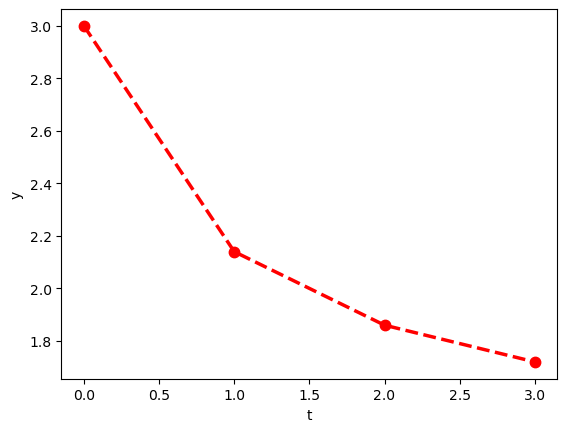

In [3]:
t, y = np.loadtxt('messung.dat', delimiter=',', skiprows=1, unpack=True)

# daten anzeigen
plt.figure()
plt.plot(t, y, 'r--', lw=2.5, marker='.', markersize=15)
plt.xlabel('t')
plt.ylabel('y');

4

Es wird angenommen, dass die Daten folgener Gesetzmäßigkeit unterliegen:
$$y = f(t) = \alpha \frac{1}{1 + t} + \beta$$

Zu bestimmende Parameter $\alpha$ und $\beta$ bilden Ergebnisvektor $x$.

Größe der Koeffizientenmatrix $A$: \[Anzahl an Daten; Anzahl an Parameter\]

In [44]:

A = np.zeros((4, 2))
A[:,1] = 1
for i in range(len(t)):
    A[i,0] = 1/(1+t[i])


A

array([[1.        , 1.        ],
       [0.5       , 1.        ],
       [0.33333333, 1.        ],
       [0.25      , 1.        ]])

Normalengleichungen aufstellen:
$$A^TAx = A^Ty$$

In [56]:
lhs = np.dot(A.transpose(),A ) # A.T @ A
rhs = np.dot(A.transpose(),y) # A.T @ y

In [93]:
x =  np.linalg.inv(lhs) @ rhs #np.dot(rhs,np.linalg.inv(lhs)) 
x



array([1.70830769, 1.29025641])

Lösen der Gleichung mittels Inverse

In [94]:
xls=np.linalg.solve(lhs,rhs) #same res
xls

array([1.70830769, 1.29025641])

In [72]:

alpha = x[0]
beta = x[1]
print(alpha,beta)

1.7083076923076916 1.290256410256411


Ergebnis darstellen

In [86]:
Ax= np.dot(A,x.transpose())

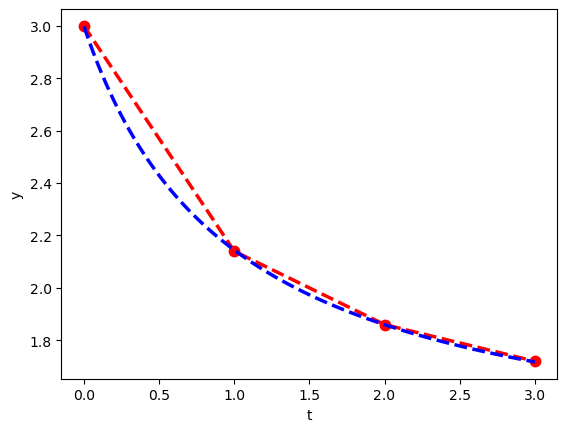

In [101]:
tn = np.linspace(min(t), max(t),100)
fm = alpha*1/(1+tn) +1* beta
plt.figure()
plt.plot(t, y, 'r--', lw=2.5, marker='.', markersize=15)
plt.plot(tn, fm, 'b--', lw=2.5)
plt.xlabel('t')
plt.ylabel('y');

Fehler zu den beobachteten Daten berechnen

In [103]:
fe = alpha*(1/(1+t)) + beta
print(fe)
print(y)
np.linalg.norm(fe-y)

[2.9985641  2.14441026 1.85969231 1.71733333]
[3.   2.14 1.86 1.72]


0.005358913016456568

Scipy.Optimize curve_fit

In [104]:
def func(t, alpha, beta):
    return alpha*(1/(1+t))+beta

popt, pcov = curve_fit(func, t, y)
alpha1 = popt[0]
beta1 = popt[1]
print(alpha1, beta1)

1.7083076922566676 1.2902564102912772


In [105]:
fe1 = alpha1*(1/(1+t)) + beta1
print(fe1)
print(y)

[2.9985641  2.14441026 1.85969231 1.71733333]
[3.   2.14 1.86 1.72]


In [106]:
err = np.linalg.norm(fe-y)
err1 = np.linalg.norm(fe1-y)
print(err, err1)

0.005358913016456568 0.005358913016456564
